In [129]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from glob import glob
import multiprocessing as mp

In [275]:
#Normalize Images to Extract Prototypes
# load image
def preproc_im(imname):
    image = Image.open(imname)
#     image = ImageOps.equalize(image)
    pixels = np.asarray(image)
    pixels = pixels.astype('float32')
    mean, std = pixels.mean(), pixels.std()
    outim = np.exp((pixels - mean) / std)*np.exp(-1*np.exp((pixels - mean) / std))
    outim+= abs(np.min(outim))
    outim*=(255/np.max(outim))
    outim=outim.astype('uint8')
    newmean=outim.mean()
    print('Meandiff is ' + str(abs(newmean-mean)) + ' For ' + str.split(imname,'-')[-1][:-4])
    return(outim)
for rawim in glob('data/RedLights2011_Medium/*.jpg'):
    outim=Image.fromarray(preproc_im(rawim),mode='RGB')
    outim.save('data/RedLights_Normedv2/'+str.split(rawim,'\\')[-1][:-4]+'.png')

Meandiff is 65.26160929361978 For 001
Meandiff is 60.35369618733725 For 002
Meandiff is 43.95425265842013 For 003
Meandiff is 122.61082412719728 For 004
Meandiff is 125.27257463243274 For 005
Meandiff is 82.09997717963324 For 006
Meandiff is 81.15219184027777 For 007
Meandiff is 138.84191245185005 For 008
Meandiff is 81.161905992296 For 009
Meandiff is 54.26828830295139 For 010
Meandiff is 65.80517035590279 For 011
Meandiff is 62.10649810791017 For 012
Meandiff is 98.37160358005099 For 013
Meandiff is 76.59551913791233 For 014
Meandiff is 72.2365643310547 For 015
Meandiff is 108.90735629611544 For 016
Meandiff is 69.98999786376953 For 017
Meandiff is 99.11327043321398 For 018
Meandiff is 72.19261993408202 For 019
Meandiff is 113.37625293307835 For 020
Meandiff is 113.85827409532334 For 021
Meandiff is 50.57209601508248 For 022
Meandiff is 59.54698367648655 For 023
Meandiff is 89.5476476711697 For 024
Meandiff is 107.14525441487629 For 025
Meandiff is 108.96016608344183 For 026
Meandiff

Meandiff is 95.78518185085721 For 217
Meandiff is 57.47814490424261 For 218
Meandiff is 73.99074147542316 For 219
Meandiff is 85.5947533501519 For 220
Meandiff is 125.1528832329644 For 221
Meandiff is 80.67729587131078 For 222
Meandiff is 41.496642083062056 For 223
Meandiff is 64.93464603000217 For 224
Meandiff is 106.59351803249783 For 225
Meandiff is 82.57910210503474 For 226
Meandiff is 75.62310170491537 For 227
Meandiff is 60.61433308919271 For 228
Meandiff is 57.077193298339836 For 229
Meandiff is 60.75903781467014 For 230
Meandiff is 109.0497728814019 For 231
Meandiff is 40.496616787380646 For 232
Meandiff is 50.775786844889325 For 233
Meandiff is 76.22572085910375 For 234
Meandiff is 53.1102116563585 For 235
Meandiff is 44.70884406195748 For 236
Meandiff is 72.2649257405599 For 237
Meandiff is 92.50772335476344 For 238
Meandiff is 80.86870388454861 For 239
Meandiff is 141.34943200005426 For 240
Meandiff is 140.6242704433865 For 241
Meandiff is 153.75396731906466 For 242
Meandiff

In [465]:
# Prototype Production
for rawpn in glob('data/kernels_noproc_nohousing/*_raw.png'):
    rawim=Image.open(rawpn)
    for rotval in [6,15]:
        rotim=rawim.rotate(rotval)
        rotim.save(str.split(rawpn,'raw')[0]+'rot'+str(rotval)+'.png')
        transrotim=rotim.transpose(Image.FLIP_LEFT_RIGHT)
        transrotim.save(str.split(rawpn,'raw')[0]+'rotneg'+str(rotval)+'.png')
    
# for imn in glob('data/kernels_noproc/*.png'):
#     rawim=Image.open(imn)
#     osize=rawim.size
#     for rsval in [.5,.75,1.25,1.5]:
#         if rsval < 1:
#             rsim=rawim.resize(size=(int(osize[0]*rsval),int(osize[1]*rsval)),resample=Image.LANCZOS)
#         else:
#             rsim=rawim.resize(size=(int(osize[0]*rsval),int(osize[1]*rsval)))
#         rsim.save(str.split(imn,'.')[0]  + '_' + str(rsval) + 'resize.png')

In [365]:
def angle_between(v1, v2, vecmag):
    return(np.arccos(np.sum(v1*v2/vecmag)))

In [477]:
import time
print(time.time())

1586930605.9594605


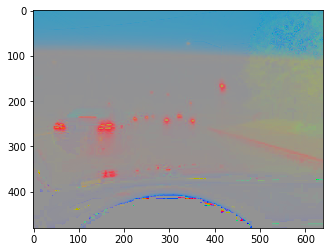

0.957 max for data/kernels_noproc_nohousing\rl1_raw.png
0.961 max for data/kernels_noproc_nohousing\rl1_raw_0.5resize.png
0.962 max for data/kernels_noproc_nohousing\rl1_raw_0.75resize.png
0.951 max for data/kernels_noproc_nohousing\rl1_raw_1.25resize.png
0.943 max for data/kernels_noproc_nohousing\rl1_raw_1.5resize.png
0.979 max for data/kernels_noproc_nohousing\rl2_raw.png
Detected! Localizing....
[244, 156, 269, 178]
0.984 max for data/kernels_noproc_nohousing\rl2_raw_0.5resize.png
Detected! Localizing....
[236, 290, 248, 301]
Detected! Localizing....
[160, 412, 172, 423]
Detected! Localizing....
[238, 346, 250, 357]
Detected! Localizing....
[246, 166, 258, 177]
0.973 max for data/kernels_noproc_nohousing\rl2_raw_0.75resize.png
0.977 max for data/kernels_noproc_nohousing\rl2_raw_1.25resize.png
Detected! Localizing....
[240, 154, 271, 181]
0.972 max for data/kernels_noproc_nohousing\rl2_raw_1.5resize.png
0.989 max for data/kernels_noproc_nohousing\rl3_raw.png
Detected! Localizing....

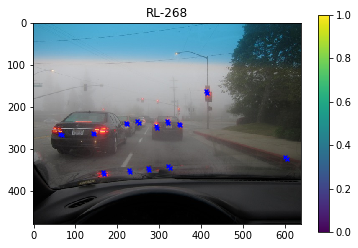

In [478]:
import time
start=time.time()
fname='data/RedLights2011_Medium/RL-268.jpg'
testim=np.clip(np.asarray(Image.open(fname))[:,:,:3],1/255,255).astype('float32')
oim=testim.copy()
testim=np.divide(testim,np.expand_dims(np.linalg.norm(testim,axis=-1),axis=-1))
plt.imshow(testim)
plt.show()
plt.close()
detmvals=[]
detbbs=[]
kerns=glob('data/kernels_noproc_nohousing/*.png')

for kernname in kerns:
    kern=np.clip(np.asarray(Image.open(kernname))[:,:,:3],1/255,255).astype('float32')
    kern=np.divide(kern,np.expand_dims(np.linalg.norm(kern,axis=-1),axis=-1))
    kernx,kerny,kernz=kern.shape 
    outim=np.zeros(testim.shape[:2])
    fillkern=kern.copy()
    denominator=np.linalg.norm(kern.flatten())**2
    zeroval=np.sqrt(((1/255)**2)*3)
    for xval in np.arange(0,testim.shape[0]-kernx-1,2):
        for yval in np.arange(0,testim.shape[1]-kerny-1,2):
            extract=testim[xval:xval+kernx,yval:yval+kerny,:kernz]
            outval=np.cos(angle_between(fillkern.flatten(),extract.flatten(),denominator))
            outim[xval,yval]=outval
    print(str(np.around(np.max(outim),3)) + ' max for ' + str(kernname))
    while np.max(outim) >= .975:
        print('Detected! Localizing....')
        goodinds=np.where(outim == np.max(outim))
        goodrow,goodcol=goodinds
        goodrow,goodcol=goodrow[0],goodcol[0]
        boundbox=[goodrow, goodcol, goodrow+kernx, goodcol+kerny]
        detmvals.append(np.max(outim))
        detbbs.append(boundbox)
        print(boundbox)
        outim[goodrow-10:goodrow+10,goodcol-10:goodcol+10]=0
badinds=[]
for bbind in range(len(detbbs)):
    thisbb=np.array(detbbs[bbind])
    diffs=np.array([np.linalg.norm(thisbb[:2] - x[:2]) for x in detbbs])
    if len(diffs[diffs < 24]) > 0:
        initdupinds=np.where(diffs < 24)[0]
        bestind=initdupinds[np.argmax(np.array(detmvals)[initdupinds])]
        badinds.extend([x for x in initdupinds if x != bestind])
badinds=list(set(badinds))
print(sorted(badinds, reverse = True))
print(len(detbbs))
for ele in sorted(badinds, reverse = True):  
    del detbbs[ele]
finish=time.time()
elap=finish-start
print(str(elap) + ' Total Seconds per Image')
plt.imshow(oim/255)
for boundbox in detbbs:
    plt.scatter([boundbox[1],boundbox[3]],[boundbox[0],boundbox[2]],marker='x', color='blue',s=15)
plt.title(str.split(fname,'.')[0][-6:])
plt.colorbar()
plt.show()
plt.close()

(array([187], dtype=int64), array([332], dtype=int64))
187 332


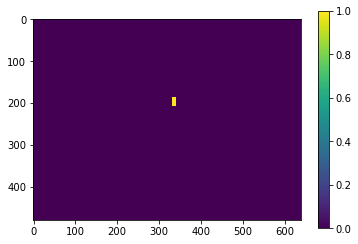

In [153]:
goodinds=np.where(outim > np.max(outim)*.99)
print(goodinds)
goodrow,goodcol=goodinds
goodrow,goodcol=goodrow[0],goodcol[0]
bound_box=[goodrow, goodcol, goodrow+kernx, goodcol+kerny]
print(goodrow,goodcol)
maskim=outim.copy()
maskim[goodinds]=1
maskim[maskim < 1]=0
maskim[goodrow:goodrow+kernx,goodcol:goodcol+kerny]=1
plt.imshow(maskim)



plt.colorbar()
plt.show()
plt.close()

61 30
(30, 480, 640)
(30, 480, 640)
(30, 480, 640)


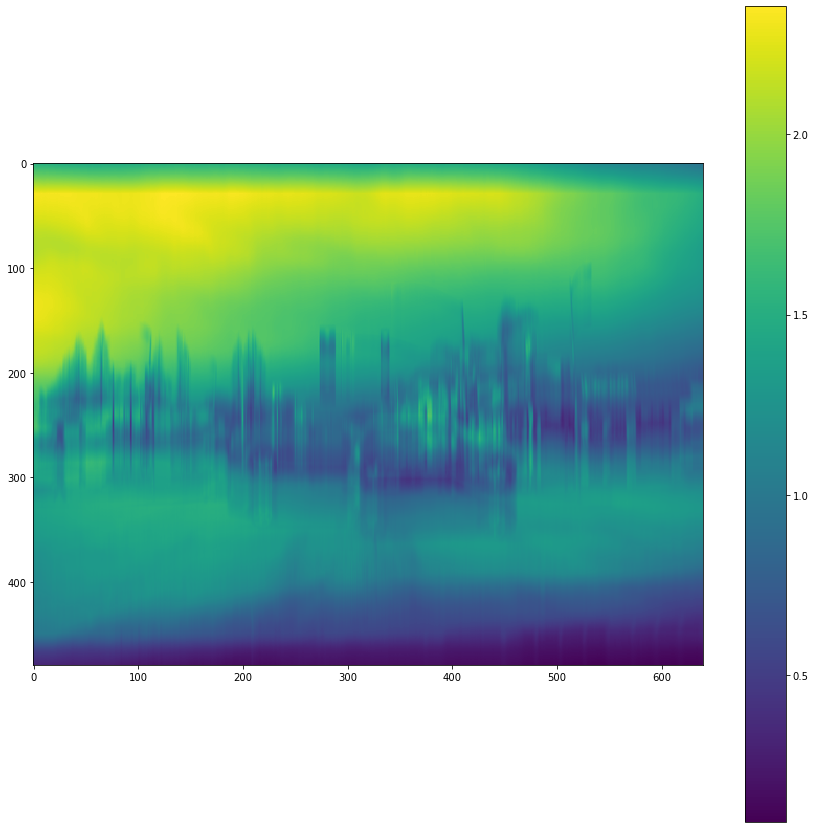

73 52
(52, 480, 640)
(52, 480, 640)
(52, 480, 640)


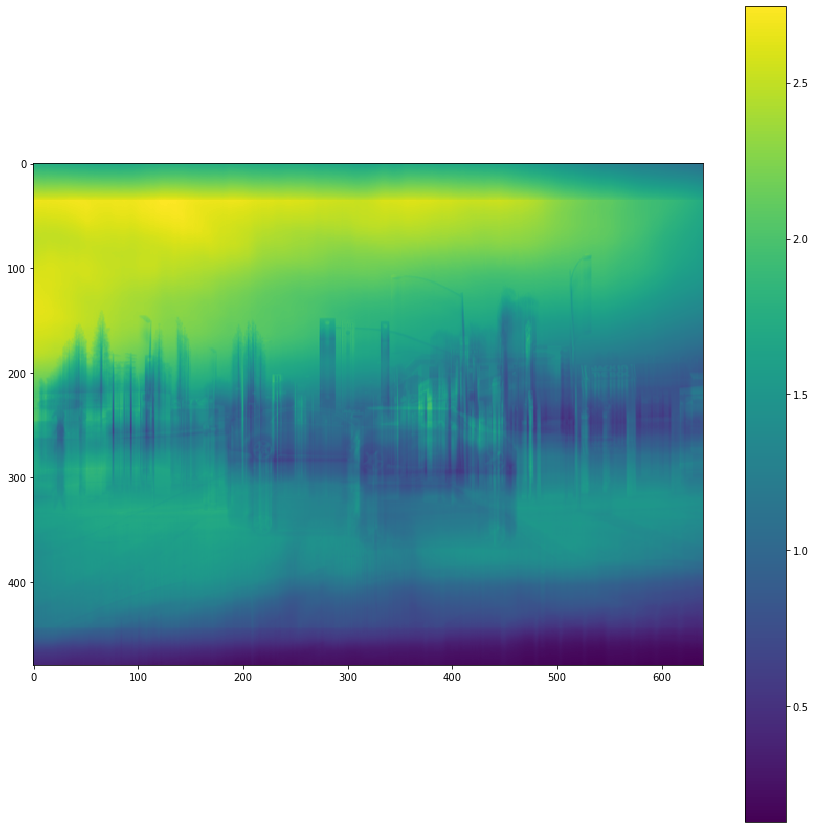

66 32
(32, 480, 640)
(32, 480, 640)
(32, 480, 640)


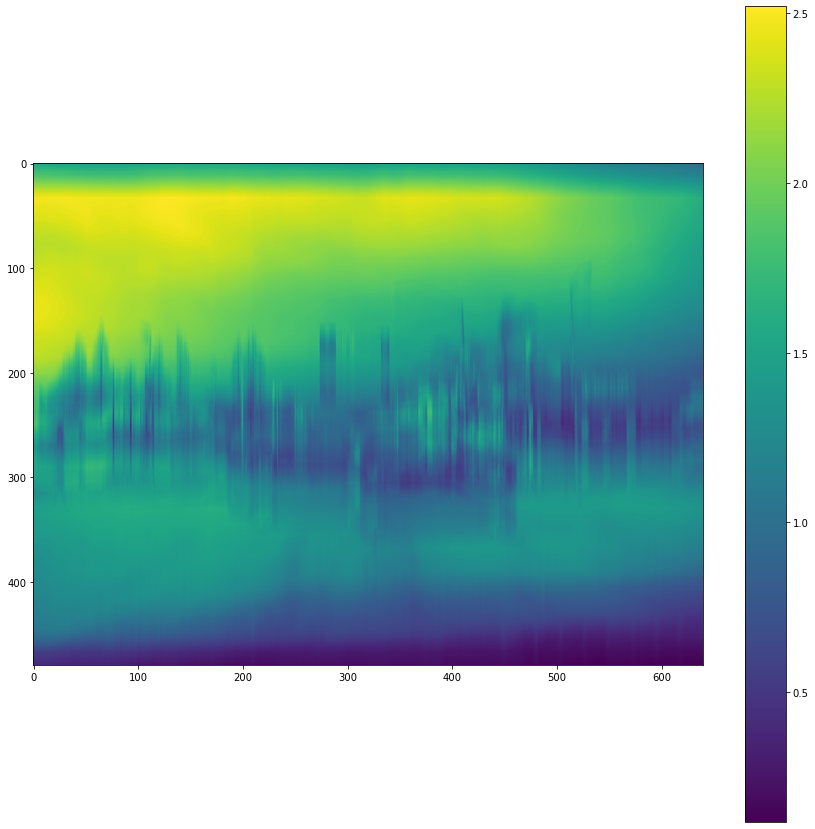

20 10
(10, 480, 640)
(10, 480, 640)
(10, 480, 640)


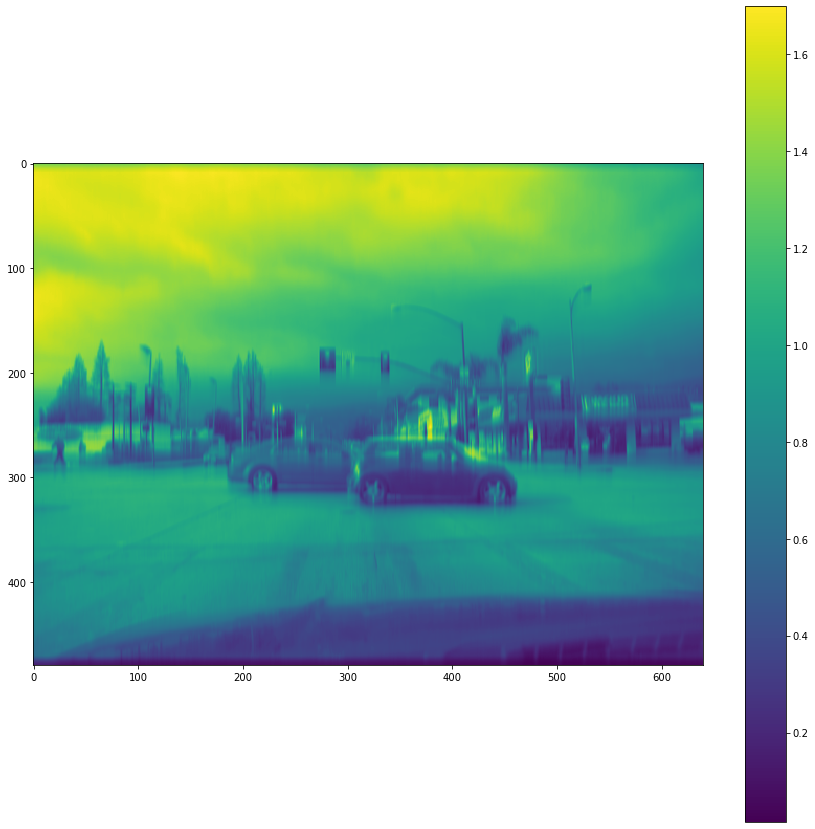

22 12
(12, 480, 640)
(12, 480, 640)
(12, 480, 640)


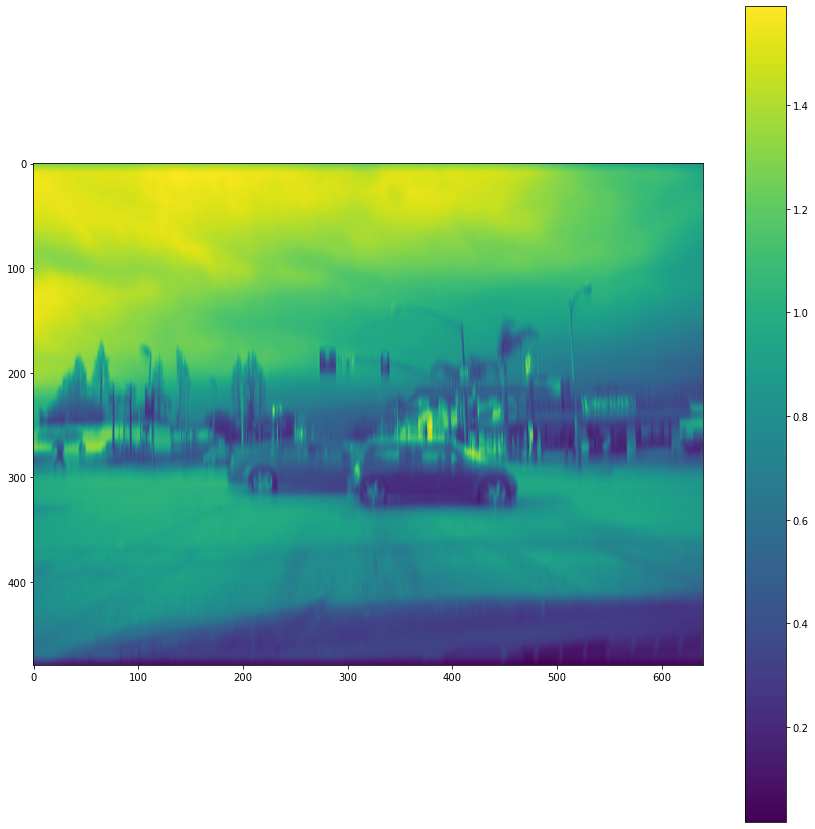

21 9
(9, 480, 640)
(9, 480, 640)
(9, 480, 640)


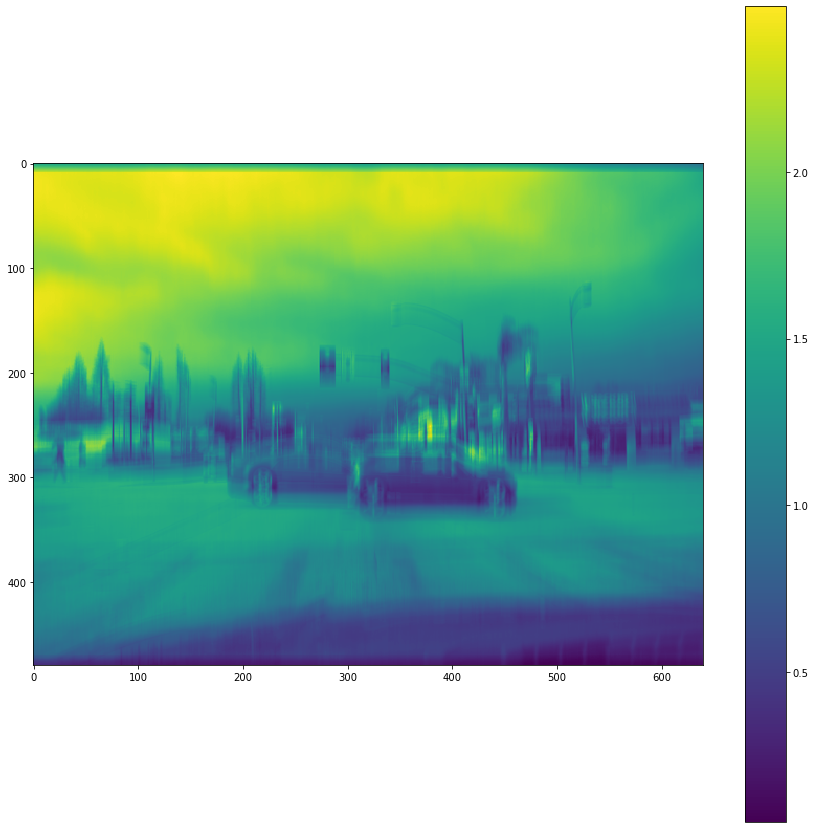

In [112]:
testim=np.asarray(Image.open('data/RedLights2011_Medium/RL-195.jpg'))
testim=testim/np.max(testim)
for imname in glob('data/kernels/*.png'):
    kern=np.asarray(Image.open(imname))
    kern=kern/np.max(kern)
    kernx,kerny,kernz=kern.shape
    print(kernx,kerny)
    chanimlist=[]
    for chan in range(3):
        outimlist=[]
        for kcol in range(kern.shape[1]):
            kernstrip=kern[:,kcol,chan]
            convim=testim.copy()[:,:,chan]
            outim=np.zeros(convim.shape)
            for col in range(convim.shape[1]):
                imstrip=convim[:,col]
                conv=np.convolve(imstrip,kernstrip,mode='same')
                outim[:,col]=conv
            outimlist.append(outim)
        print(np.array(outimlist).shape)
        finalim=np.sum(np.array(outimlist),axis=0)
        chanimlist.append(finalim)
    finalfinalim=np.swapaxes(np.swapaxes(np.array(chanimlist),0,-1),0,1)
    finalfinalim=finalfinalim/np.max(finalfinalim)
    finalfinalim=np.sum(finalfinalim, axis=-1)
    plt.figure(figsize=(15,15))
    plt.imshow(finalfinalim)
    plt.colorbar()
    plt.show()
    plt.close()

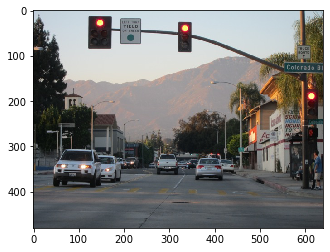

(480, 640)


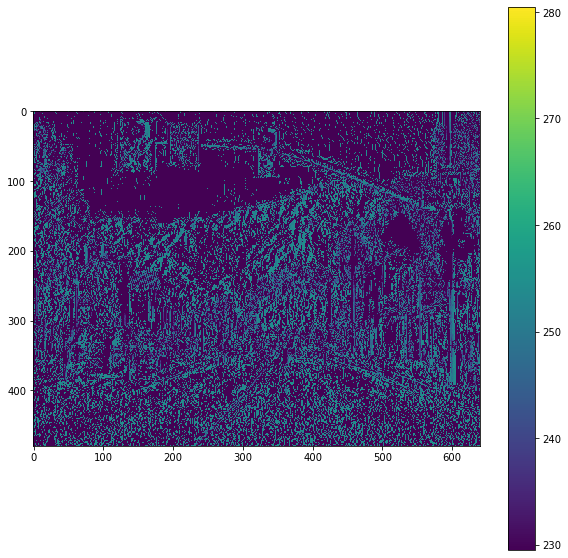

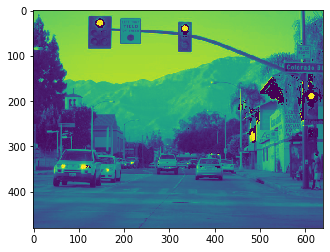

In [318]:
testim=np.asarray(Image.open('data/RedLights2011_Medium/RL-010.jpg'))
plt.imshow(testim)
plt.show()
plt.close()
mask=np.where((testim[:,:,0] > testim[:,:,1]*1.33) & (testim[:,:,0] > testim[:,:,2]*2.5) )
maskim=testim.copy()[:,:,0]
maskim[mask]=0
print(maskim.shape)
shiftdiffim=maskim-np.roll(maskim,1,axis=1)
shiftdiffim[shiftdiffim < 0]=0
shiftdiffim=abs(shiftdiffim)
plt.figure(figsize=(10,10))
plt.imshow(shiftdiffim,vmin=np.percentile(shiftdiffim,95),vmax=np.max(shiftdiffim))
plt.colorbar()
plt.show()
plt.close()
plt.imshow(maskim)